In [1]:
# !pip install datasets==3.6.0
# !pip install rouge_score
# !pip install evaluate


In [2]:
import datasets
datasets.__version__

'3.6.0'

In [3]:
from datasets import load_dataset

spanish_dataset = load_dataset("buruzaemon/amazon_reviews_multi", "es")
english_dataset = load_dataset("buruzaemon/amazon_reviews_multi", "en")
english_dataset
# english_datase

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for buruzaemon/amazon_reviews_multi contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/buruzaemon/amazon_reviews_multi.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train.jsonl.gz:   0%|          | 0.00/19.0M [00:00<?, ?B/s]

validation.jsonl.gz:   0%|          | 0.00/472k [00:00<?, ?B/s]

test.jsonl.gz:   0%|          | 0.00/476k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

train.jsonl.gz:   0%|          | 0.00/21.5M [00:00<?, ?B/s]

validation.jsonl.gz:   0%|          | 0.00/542k [00:00<?, ?B/s]

test.jsonl.gz:   0%|          | 0.00/536k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [4]:
english_dataset["train"]

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 200000
})

In [5]:
def random_samples(dataset,num_samples,seed=42):
  sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
  for x in sample:
    print(f"\n'>> Title: {x['review_title']}'")
    print(f"'>> Review: {x['review_body']}'")
  return sample[0]

In [6]:
result = random_samples(english_dataset,4)



'>> Title: Worked in front position, not rear'
'>> Review: 3 stars because these are not rear brakes as stated in the item description. At least the mount adapter only worked on the front fork of the bike that I got it for.'

'>> Title: meh'
'>> Review: Does it’s job and it’s gorgeous but mine is falling apart, I had to basically put it together again with hot glue'

'>> Title: Can't beat these for the money'
'>> Review: Bought this for handling miscellaneous aircraft parts and hanger "stuff" that I needed to organize; it really fit the bill. The unit arrived quickly, was well packaged and arrived intact (always a good sign). There are five wall mounts-- three on the top and two on the bottom. I wanted to mount it on the wall, so all I had to do was to remove the top two layers of plastic drawers, as well as the bottom corner drawers, place it when I wanted and mark it; I then used some of the new plastic screw in wall anchors (the 50 pound variety) and it easily mounted to the wall. 

In [7]:
import json
print(json.dumps(result,indent=4))

{
    "review_id": "en_0976163",
    "product_id": "product_en_0244250",
    "reviewer_id": "reviewer_en_0857377",
    "stars": 3,
    "review_body": "3 stars because these are not rear brakes as stated in the item description. At least the mount adapter only worked on the front fork of the bike that I got it for.",
    "review_title": "Worked in front position, not rear",
    "language": "en",
    "product_category": "other"
}


In [8]:
english_dataset.set_format("pandas")
english_df = english_dataset["train"][:]
english_df.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home


<Axes: xlabel='product_category'>

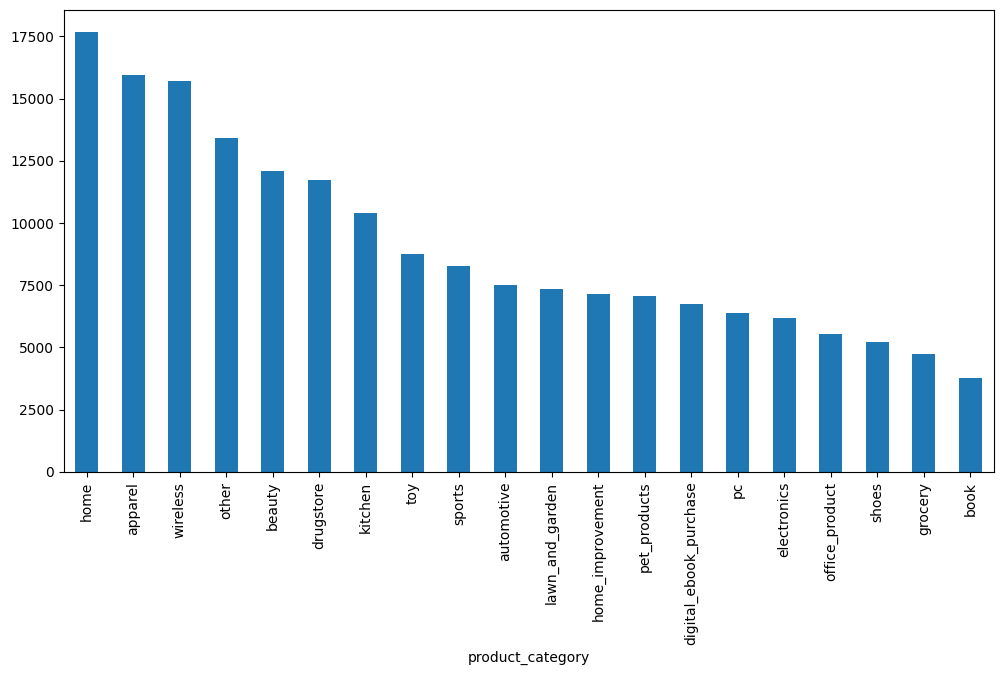

In [9]:
english_df["product_category"].value_counts()[:20].plot(kind="bar",figsize=(12,6))

In [10]:
#
def filter_books(example):
    return (
        example["product_category"] == "book"
        or example["product_category"] == "digital_ebook_purchase"
    )

In [11]:
english_dataset.reset_format()

In [12]:
english_books = english_dataset.filter(filter_books)
spanish_books = spanish_dataset.filter(filter_books)
spanish_books

Filter:   0%|          | 0/200000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/200000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 7107
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 193
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 164
    })
})

In [13]:
result = random_samples(english_books,4)


'>> Title: I'm dissapointed.'
'>> Review: I guess I had higher expectations for this book from the reviews. I really thought I'd at least like it. The plot idea was great. I loved Ash but, it just didnt go anywhere. Most of the book was about their radio show and talking to callers. I wanted the author to dig deeper so we could really get to know the characters. All we know about Grace is that she is attractive looking, Latino and is kind of a brat. I'm dissapointed.'

'>> Title: Good art, good price, poor design'
'>> Review: I had gotten the DC Vintage calendar the past two years, but it was on backorder forever this year and I saw they had shrunk the dimensions for no good reason. This one has good art choices but the design has the fold going through the picture, so it's less aesthetically pleasing, especially if you want to keep a picture to hang. For the price, a good calendar'

'>> Title: Helpful'
'>> Review: Nearly all the tips useful and. I consider myself an intermediate to a

In [14]:
english_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [15]:
from datasets import concatenate_datasets, DatasetDict
books_dataset= DatasetDict()

for split in english_dataset.keys():
  books_dataset[split] = concatenate_datasets(
        [english_books[split], spanish_books[split]]
    )
  books_dataset[split] = books_dataset[split].shuffle(seed=42)

# Peek at a few examples
result = random_samples(books_dataset,3)



'>> Title: Easy to follow!!!!'
'>> Review: I loved The dash diet weight loss Solution. Never hungry. I would recommend this diet. Also the menus are well rounded. Try it. Has lots of the information need thanks.'

'>> Title: PARCIALMENTE DAÑADO'
'>> Review: Me llegó el día que tocaba, junto a otros libros que pedí, pero la caja llegó en mal estado lo cual dañó las esquinas de los libros porque venían sin protección (forro).'

'>> Title: no lo he podido descargar'
'>> Review: igual que el anterior'


In [16]:
books_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 17612
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 424
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 442
    })
})

In [17]:
# from huggingface_hub import notebook_login
# notebook_login()

In [18]:
# books_dataset.push_to_hub("enlish_spanish_amazon-books-reviews")


In [19]:
books_dataset = books_dataset.filter(lambda x: len(x["review_title"].split()) > 2)
books_dataset

Filter:   0%|          | 0/17612 [00:00<?, ? examples/s]

Filter:   0%|          | 0/424 [00:00<?, ? examples/s]

Filter:   0%|          | 0/442 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 9672
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 238
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 245
    })
})

In [20]:
result = random_samples(books_dataset,1)


'>> Title: Not funny, not romantic'
'>> Review: In fairness, I did quit midway through. Believe me, it wasn't because of the hilarious humor, (I found none.) And it wasn't because of the fabulous romance. (Again, I found none.) I read eleven chapters, 38% percent of the book, not a laugh out loud moment once. The h has only encountered the presumed H, one time. If there was any chemistry there, it didnt translate well, in print. He appears at this point, to be forgotten. It just seems to be going on and on and on. Round in circles. Taking the long way, but getting nowhere. I didn't stop because it was interesting. To me, it just was not.'


Let’s test out the mT5 tokenizer on a small example:

In [21]:
from transformers import AutoTokenizer
model_checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [22]:
result["review_title"]

'Not funny, not romantic'

In [23]:
input =tokenizer(result["review_title"])
input

{'input_ids': [7483, 259, 54464, 261, 776, 53611, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [24]:
target= tokenizer(text_target=result["review_title"])
target

{'input_ids': [7483, 259, 54464, 261, 776, 53611, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [25]:
tokenizer(result["review_title"],text_target=result["review_title"])

{'input_ids': [7483, 259, 54464, 261, 776, 53611, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1], 'labels': [7483, 259, 54464, 261, 776, 53611, 1]}

In [26]:
# get the context size of the tokenizer

tokenizer.model_max_length

1000000000000000019884624838656

In [27]:
max_input_length = 512
max_target_length = 120

def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["review_body"],
        max_length=max_input_length,
        truncation=True,
    )

    labels = tokenizer(
        examples["review_title"], max_length=max_target_length, truncation=True
    )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [28]:
tokenized_datasets = books_dataset.map(preprocess_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/9672 [00:00<?, ? examples/s]

Map:   0%|          | 0/238 [00:00<?, ? examples/s]

Map:   0%|          | 0/245 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 9672
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 238
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 245
    })
})

In [29]:
books_dataset["train"].column_names

['review_id',
 'product_id',
 'reviewer_id',
 'stars',
 'review_body',
 'review_title',
 'language',
 'product_category']

Metrics for text summarization


In [31]:
!pip install evaluate
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00
  Using cached rouge_score-0.1.2-py3-none-any.whl


In [32]:
import evaluate

rouge_score = evaluate.load("rouge")

In [33]:
generated_summary = "I absolutely loved reading the Hunger Games"
reference_summary = "I loved reading the Hunger Games"

In [34]:
scores = rouge_score.compute(
    predictions=[generated_summary], references=[reference_summary]
)
scores

{'rouge1': np.float64(0.923076923076923),
 'rouge2': np.float64(0.7272727272727272),
 'rougeL': np.float64(0.923076923076923),
 'rougeLsum': np.float64(0.923076923076923)}

In [35]:
!pip install nltk

In [36]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [37]:
books_dataset["train"][1]["review_body"]

'I grew up reading Koontz, and years ago, I stopped,convinced i had "outgrown" him. Still,when a friend was looking for something suspenseful too read, I suggested Koontz. She found Strangers. The excitement art how good it was startled me. I was sure i had recommended something else. I ordered a copy for myself. This was a great reintroduction to an old favorite writer -- a novel full of fully developed characters that are totally relatable. People you could care about with full back stories. A mystery that had to be solved. I expected it to be the book I read every few weeks, only on flights. Instead, I\'ve ignored everything and everybody to finish this. Definitely a must read.'

In [38]:
from nltk.tokenize import sent_tokenize

def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])

print(three_sentence_summary(books_dataset["train"][1]["review_body"]))


I grew up reading Koontz, and years ago, I stopped,convinced i had "outgrown" him.
Still,when a friend was looking for something suspenseful too read, I suggested Koontz.
She found Strangers.


In [39]:
def evaluate_baseline(dataset, metric):
    summaries = [three_sentence_summary(text) for text in dataset["review_body"]]
    return metric.compute(predictions=summaries, references=dataset["review_title"])

In [40]:
import pandas as pd

score = evaluate_baseline(books_dataset["validation"], rouge_score)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, round(score[rn]*100, 2)) for rn in rouge_names)
rouge_dict

{'rouge1': np.float64(16.8),
 'rouge2': np.float64(8.86),
 'rougeL': np.float64(15.51),
 'rougeLsum': np.float64(15.93)}

In [41]:
# {'rouge1': 16.74, 'rouge2': 8.83, 'rougeL': 15.6, 'rougeLsum': 15.96}

In [42]:
from transformers import AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [43]:
from huggingface_hub import notebook_login

notebook_login()

In [51]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 8
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-summary-en-es",
    eval_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    logging_steps=logging_steps,
    push_to_hub=True,
)

In [68]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Ensure predictions are within the valid range of the tokenizer's vocabulary
    predictions[predictions >= tokenizer.vocab_size] = tokenizer.pad_token_id
    predictions[predictions < 0] = tokenizer.pad_token_id # Also handle potential negative values

    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract the median scores
    result = {key: value * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

In [69]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [71]:
tokenized_datasets = tokenized_datasets.remove_columns(
    books_dataset["train"].column_names
)

In [57]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 9672
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 238
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 245
    })
})

In [72]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,2.346900,3.594879,17.785200,8.969900,17.313100,17.170400
2,3.556600,3.085845,17.152700,8.444700,16.920900,16.899400
3,3.346800,3.054806,17.182500,8.149100,16.826000,16.847300


In [ ]:
trainer.evaluate()
# 73c9cba4aa03060ce4cd30ba7733ba3390e61b67

In [ ]:
trainer.push_to_hub(commit_message="Training complete", tags="summarization")